simple test for circularcenterellipse2. 
Given a set of starting points and their corresponding vectors, draw the vectors FROM those points to their intersection point, and then reflect from the second intersection point. 
ie. reflected wave 1 --> incident wave 2 
and incident wave 2 hits intersection 2 --> reflected wave 2.

Mira

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFun import *
from random import uniform

In [2]:
r = int(100)
origin = [0,250,0] #(x0,y0,z0)
L = int(300)
coeffellipse = [263.9,256,64.15]
theta = np.pi/2
specnum = 1000
xrange = 23.07

xi,yi,zi,xr,yr,zr,xp,yp,zp, pointints, vect = reflect_specORIGINellipsePOINT(coeffellipse,r,origin,L, theta, specnum, xrange, 'pos')

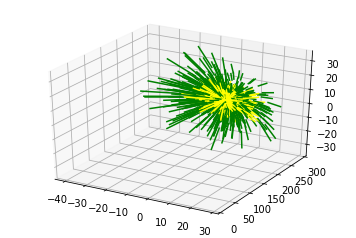

In [3]:
pl3dsurf = pl.figure().gca(projection = '3d')
#pl3dsurf.plot_trisurf(Xset,Yset,Zset, linewidth = .2, antialiased=True, color = 'blue')
#pl3dsurf.plot_trisurf(Xset2,Yset2,Zset2, linewidth = .2, antialiased=True, color = 'blue')
for n in range (0,len(xi)):
    #pl3dsurf.scatter(pointints[n][0], pointints[n][1], pointints[n][2], color = 'black')
    pl3dsurf.plot(xi[n],yi[n],zi[n], color = 'yellow') #intial
    pl3dsurf.plot(xr[n],yr[n],zr[n], color = 'green') #reflected
pl3dsurf.set_ylim([0,300])
#pl3dsurf.set_zlim([0,30])
#pl3dsurf.set_xlim([0,30])
pl.show()
#YELLOW INCIDENT 1
#GREEN IS REFLECTED 1 == INCIDENT 2 

In [4]:
origin1 = [0,0] #x,y
origin2 = [90,0] #x,y
origin3 = [0,64]
origin4 = [90,64] #x,y 
coeffellipse = [263.9,256,64.15] 
#Centered around x-axis, not shifted, 
X1,Y1,Z1,X2,Y2,Z2 = FTSCEllipsoid(50,np.pi/8, coeffellipse, 64.15, origin1, 'pos')
X3,Y3,Z3,X4,Y4,Z4 = FTSCEllipsoid(50,np.pi/8, coeffellipse, 64.15, origin2, 'pos')
X52,Y52,Z52,X62,Y62,Z62 = FTSCEllipsoid(50,np.pi/8, coeffellipse, 64.15, origin3, 'neg')
X72,Y72,Z72,X82,Y82,Z82 = FTSCEllipsoid(50,np.pi/8, coeffellipse, 64.15, origin4, 'neg')
Xset, Yset, Zset = setrange2d(32.07, X1,Y1,Z1, origin1)
Xset2, Yset2, Zset2 = setrange2d(32.07, X2, Y2, Z2, origin1)
Xset3, Yset3, Zset3 = setrange2d(32.07, X3,Y3,Z3, origin2)
Xset4, Yset4, Zset4 = setrange2d(32.07, X4, Y4, Z4, origin2)
Xset5, Yset5, Zset5 = setrange2d(32.07, X52,Y52,Z52, origin3)
Xset6, Yset6, Zset6 = setrange2d(32.07, X62, Y62, Z62, origin3)
Xset7, Yset7, Zset7 = setrange2d(32.07, X72,Y72,Z72, origin4)
Xset8, Yset8, Zset8 = setrange2d(32.07, X82, Y82, Z82, origin4)

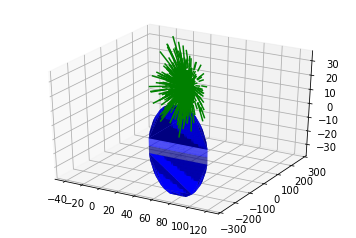

In [5]:
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(Xset7,Yset7,Zset7, linewidth = .2, antialiased=True, color = 'blue')
pl3dsurf.plot_trisurf(Xset8,Yset8,Zset8, linewidth = .2, antialiased=True, color = 'blue')

for n in range (0,len(xi)):
    #pl3dsurf.scatter(pointints[n][0], pointints[n][1], pointints[n][2], color = 'black')
    #pl3dsurf.plot(xi[n],yi[n],zi[n], color = 'yellow') #intial
    pl3dsurf.plot(xr[n],yr[n],zr[n], color = 'green') #reflected
pl3dsurf.set_ylim([0,300])
pl3dsurf.set_ylim([-300,300])
pl.show()
#want to find intersection of these rays and this ellipse

In [6]:
#specifically for a 'negative' ellipse (other side of the x-axis)
#v = vector of incident ray
#p = origin of source
#ellipseorigin=  origin of ellipse (if shifted or not)
#sign = if is on positive or negative side of y axis
def reflectellipsePOINT1shift(coeffellipse,r,v,p, ellipseorigin):#, sign): 
    c = tangcoef(p,v,coeffellipse) #plane coefficients
    VectL = v #incident vector#defining points of incident vector
    #VectLinit = [-a for a in v]
    VectLinit = v 
    VectLNorm = norm(v) #incident unit vector
    dU, N = plane_info(c,r) #gradient and normal of plane
    #reflected ray
    #VectL2n = VectLNorm + 2*N #reflected vector
    VectL2 = VectLNorm - 2*N #IS IT PLUS OR MINUS
    VectLNorm2 = norm(VectL2) #reflected unit vector
    xp,yp,zp = make_plane(c,r) #plane
    xint,yint,zint = ellipselineintshift(p,v,coeffellipse, ellipseorigin)
    #if sign == 'pos': #if the ellipse is positive
        #xint,yint,zint = ellipselineintshift(p,v,coeffellipse, ellipseorigin)
    #if sign == 'neg': #if the ellipse is the negative side, the 'intersection point' is rotated
        #xinti,yinti,zinti = ellipselineintshift(p,v,coeffellipse, ellipseorigin)
        #vi = np.array(xinti, yinti, zinti)
        #vf = np.array(np.dot(vi,Rx(np.pi)))
        #xint, yint, zint = vf[0], vf[1], vf[2]
    #pointintRETURN = [xint,yint,zint]
    pointint = [float(xint[0]),float(yint[0]),float(zint[0])] #array and points of intersection
    pointintneg = [float(xint[1]),float(yint[1]),float(zint[1])] #array and points of intersection
    L1 = np.sqrt((pointint[0] - p[0])**2 + (pointint[1] - p[1])**2 + (pointint[2] - p[2])**2)
    L1neg = np.sqrt((pointintneg[0] - p[0])**2 + (pointintneg[1] - p[1])**2 + (pointintneg[2] - p[2])**2)
    xi,yi,zi = make_line(p,VectLinit,L1) #incident line from intersection point
    xr,yr,zr = make_line(pointint,VectL2,L1)
    xin,yin,zin = make_line(p,VectLinit,L1neg) #incident line from intersection point
    xrn,yrn,zrn = make_line(pointintneg,VectL2,L1neg)
    return xi,yi,zi,xr,yr,zr,xp,yp,zp,xin,yin,zin,xrn,yrn,zrn, pointint, pointintneg, VectL2
def reflect_specellipsePOINTshift(coeffellipse,r,pointints,vectors, xrange, sign, ellipseorigin):
    xi = []
    yi = []
    zi = []
    xr = []
    yr = []
    zr = []
    xp = []
    yp = []
    zp = []
    vect = []
    vectors = np.array(vectors)
    origins = np.array(pointints)
    for i in range (0, len(vectors)):
        Vi = vectors[i]
        origin = origins[i]
        xiL,yiL,ziL,xrL,yrL,zrL,xpL,ypL,zpL,xinL,yinL,zinL,xrnL,yrnL,zrnL, pointint, pointintneg, vectL2 = reflectellipsePOINT1shift(coeffellipse,r,Vi,origin, ellipseorigin)
        if setrange3dind(xrange, pointint[0], pointint[1], pointint[2], origin, sign) == True: 
            xi.append(xiL)
            yi.append(yiL)
            zi.append(ziL)
            xr.append(xrL)
            yr.append(yrL)
            zr.append(zrL)
            xp.append(xpL)
            yp.append(ypL)
            zp.append(zpL)
            pointints.append(pointint) 
            vect.append(vectL2)
        if setrange3dind(xrange, pointintneg[0], pointintneg[1], pointintneg[2], origin, sign) == True:
            xi.append(xinL)
            yi.append(yinL)
            zi.append(zinL)
            xr.append(xrnL)
            yr.append(yrnL)
            zr.append(zrnL)
            xp.append(xpL)
            yp.append(ypL)
            zp.append(zpL)
            pointints.append(pointintneg)
            vect.append(vectL2)
    return xi,yi,zi,xr,yr,zr,xp,yp,zp, pointints, vect

In [7]:
Vi = [1, -60/8, 10/80]
r = int(100)
origin = [0,250,0] #(x0,y0,z0)
L = int(300)
coeffellipse = [263.9,256,64.15]
theta = 0
specnum = 1000
xrange = 23.07


xiL,yiL,ziL,xrL,yrL,zrL,xpL,ypL,zpL,xinL,yinL,zinL,xrnL,yrnL,zrnL, pointint, pointintneg, vectL2 = reflectellipsePOINT1shift(coeffellipse,r,Vi,origin, origin4)




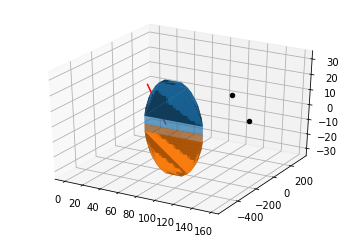

In [8]:
pl3dsurf = pl.figure().gca(projection = '3d')
x,y,z = make_line(origin, Vi, 800)
pl3dsurf.plot_trisurf(Xset7,Yset7,Zset7, linewidth = .2, antialiased=True)
pl3dsurf.plot_trisurf(Xset8,Yset8,Zset8, linewidth = .2, antialiased=True)
pl3dsurf.scatter(pointintneg[0], pointintneg[1], pointintneg[2], color = 'black')
pl3dsurf.scatter(pointint[0], pointint[1], pointint[2], color = 'black')
pl3dsurf.plot(x,y,z, color = 'red')
pl.show()
#clearly has been shifted on the x axis but not OVER the x axis

In [9]:
pointintneg

[89.20015922505289, 319.99880581210334, -0.09998009686838961]

notes: trying to get a ray to correctly intersect with an ellipse on the negative side of the y axis. (using origin4)
for some reason though the line seems to intersect correctly, the intersection points given don't seem to correspond. (see page 108)

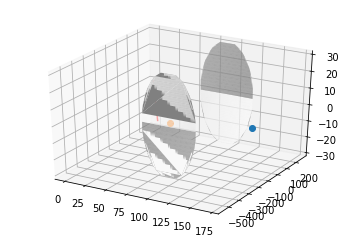

In [64]:
#doing this explicitly line by line to find error
p = origin
v = [92,-570, 2.56]
x,y,z = make_line(origin, Vi, 800)
ellipseorigin = origin4
xint,yint,zint = ellipselineintshift(p,v,coeffellipse, ellipseorigin)
pointint = [float(xint[0]),float(yint[0]),float(zint[0])] #array and points of intersection
pointintneg = [float(xint[1]),float(yint[1]),float(zint[1])] #array and points of intersection
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot([xint[0]],[yint[0]],[zint[0]], marker = 'o')
pl3dsurf.plot_trisurf(Xset7,Yset7,Zset7, linewidth = .2, antialiased=True, color = 'white')
pl3dsurf.plot_trisurf(Xset8,Yset8,Zset8, linewidth = .2, antialiased=True, color = 'white')
pl3dsurf.plot_trisurf(Xset3,Yset3,Zset3, linewidth = .2, antialiased=True, color = 'white')
pl3dsurf.plot_trisurf(Xset4,Yset4,Zset4, linewidth = .2, antialiased=True, color = 'white')

pl3dsurf.plot([Xset7[150]],[Yset7[150]],[Zset7[150]], marker = 'o')
pl3dsurf.plot(x,y,z, color = 'red')
pl.show()
#clearly the intersection is on the wrong side

#now rotating the intersection point across the xaxis


In [58]:
print(Xset7[150],Yset7[150],Zset7[150])
print(pointint[0], pointint[1], pointint[2])

92.2679292929 -319.980270181 2.56446221553
169.73739514958285 -180.02516560067636 2.218779691118827


#continuing now to try to fix how to shift (using y2)
def rotatestrandboundshiftCORRECTING(theta, coeffellipse,length,origin, sign):
    Rotated = []
    xc,yc1,yc2,zc = createellipseboundshift(coeffellipse,length,origin)
    if sign == 'pos':
        for i in range (0,100): 
            v = [xc[i], yc1[i],zc[i]] # number of original points
            v2 = np.array(np.dot(v,Rx(theta))) #multiplied by rotation vector
            Rotated.append(v2[0]) #rotated vectors
    if sign == 'neg':
        for i in range (0,100):
            v = [xc[i], yc2[i], zc[i]] #number of original points on NEGATIVE side of ellipse
            v2 = np.array(np.dot(v,Rx(theta)))
            Rotated.append(v2[0])
    xcR1 = []
    ycR1 = []
    zcR1 = []
    for j in range (0,100):
        xcR1.append(Rotated[j][0])
        ycR1.append(Rotated[j][1])
        zcR1.append(Rotated[j][2])
    return xcR1,ycR1,zcR1

def createzboundshiftCORRECTING(a,n, coeffellipse, length, origin, sign):
    x1 = []
    y1 = []
    z1 = []
    for i in range (0,a):
        theta = np.linspace(0,n,a)
        x,y,z = rotatestrandboundshiftCORRECTING(theta[i], coeffellipse, length, origin, sign)
        x1.extend(x)
        y1.extend(y)
        z1.extend(z)
    return x1,y1,z1

def FTSCEllipsoidCORRECTING (a,n, coeffellipse, length, origin, sign):
    X,Y,Z = createzboundshiftCORRECTING(a,n, coeffellipse, length, origin, sign)
    X1,Y1,Z1 = createzboundshiftCORRECTING(a,-n, coeffellipse, length, origin, sign)
    if sign != 'pos' and sign != 'neg':
        print ('Error')
    return X,Y,Z, X1, Y1, Z1

#doing this explicitly line by line to find error
p = origin
v = [92,-570, 2.56]
x,y,z = make_line(origin, Vi, 800)
ellipseorigin = origin4
xint,yint,zint = ellipselineintshiftCORRECTING(p,v,coeffellipse, ellipseorigin)
pointint = [float(xint[0]),float(yint[0]),float(zint[0])] #array and points of intersection
pointintneg = [float(xint[1]),float(yint[1]),float(zint[1])] #array and points of intersection
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot([xint[0]],[yint[0]],[zint[0]], marker = 'o')
pl3dsurf.plot_trisurf(Xset7,Yset7,Zset7, linewidth = .2, antialiased=True, color = 'white')
pl3dsurf.plot_trisurf(Xset8,Yset8,Zset8, linewidth = .2, antialiased=True, color = 'white')
pl3dsurf.plot_trisurf(Xset3,Yset3,Zset3, linewidth = .2, antialiased=True, color = 'white')
pl3dsurf.plot_trisurf(Xset4,Yset4,Zset4, linewidth = .2, antialiased=True, color = 'white')

pl3dsurf.plot([Xset7[150]],[Yset7[150]],[Zset7[150]], marker = 'o')
pl3dsurf.plot(x,y,z, color = 'red')
pl.show()
#clearly the intersection is on the wrong side

#now rotating the intersection point across the xaxis
